In [6]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1)	Abrir as imagens coloridas e mostrar a imagem e seus histogramas (separados) cada canal de cor. Considerar os seguintes sistemas de cores:
a.	RGB
b.	HSV ou HSI
c.	Lab


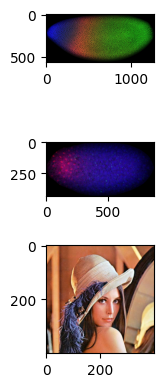

In [7]:
img1 = cv2.imread("image.jpg", cv2.IMREAD_COLOR)
img1RGB = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("image2.jpg", cv2.IMREAD_COLOR)
img2RGB = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3 = cv2.imread("Lenna.jpg", cv2.IMREAD_COLOR)
img3RGB = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

plt.subplot(3,4,1)
plt.imshow(img1RGB)

plt.subplot(3,4,4*1+1)
plt.imshow(img2RGB)

plt.subplot(3,4,4*2+1)
plt.imshow(img3RGB)


In [8]:
def plot_histogram(image, color_space, channels, color_map):
    plt.figure(figsize=(12, 4))
    for i, channel in enumerate(channels):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color_map[i]) # Color Map define as cores das linhas
        plt.xlim([0, 256])
    plt.title(f'Histogram - {color_space}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()


In [9]:
def plot_image_channels(image_path):
    image_bgr = cv2.imread(image_path)

    # 1. Exibir imagem em RGB
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(image_rgb)
    plt.title("Image - RGB")
    plt.axis('off')
    plt.show()

    # Histogramas RGB
    plot_histogram(image_rgb, color_space='RGB', channels=['R', 'G', 'B'], color_map=['red', 'green', 'blue'])

    # 2. Exibir imagem em HSV
    image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
    plt.figure()
    plt.imshow(cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB))
    plt.title("Image - HSV")
    plt.axis('off')
    plt.show()

    # Histogramas HSV
    plot_histogram(image_hsv, color_space='HSV', channels=['H', 'S', 'V'], color_map=['orange', 'green', 'blue'])

    # 3. Exibir imagem em Lab
    image_lab = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2Lab)
    plt.figure()
    plt.imshow(cv2.cvtColor(image_lab, cv2.COLOR_Lab2RGB))
    plt.title("Image - Lab")
    plt.axis('off')
    plt.show()

    # Histogramas Lab
    plot_histogram(image_lab, color_space='Lab', channels=['L', 'A', 'B'], color_map=['black', 'green', 'blue'])


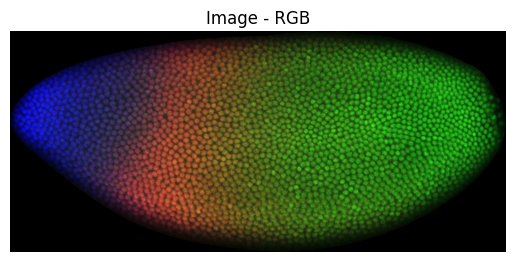

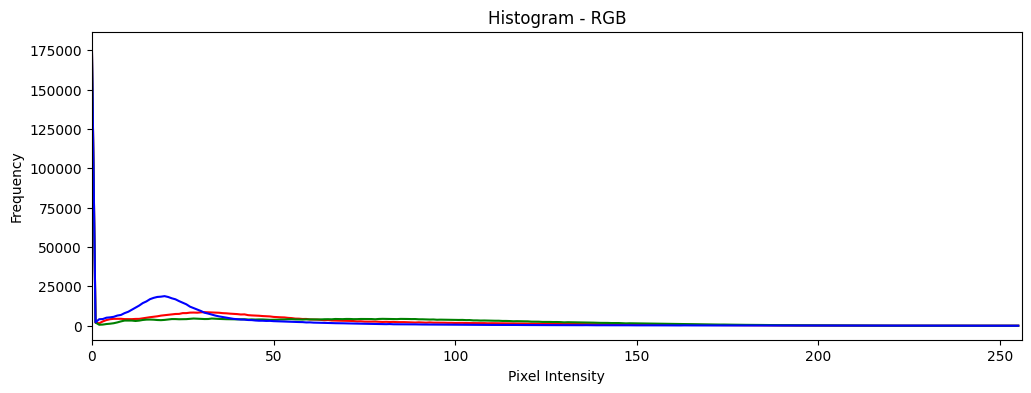

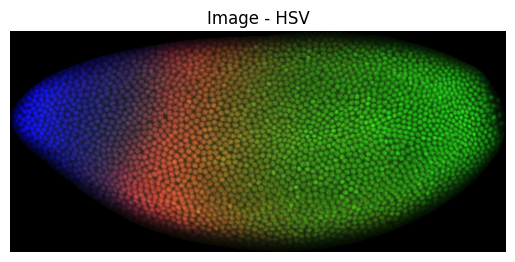

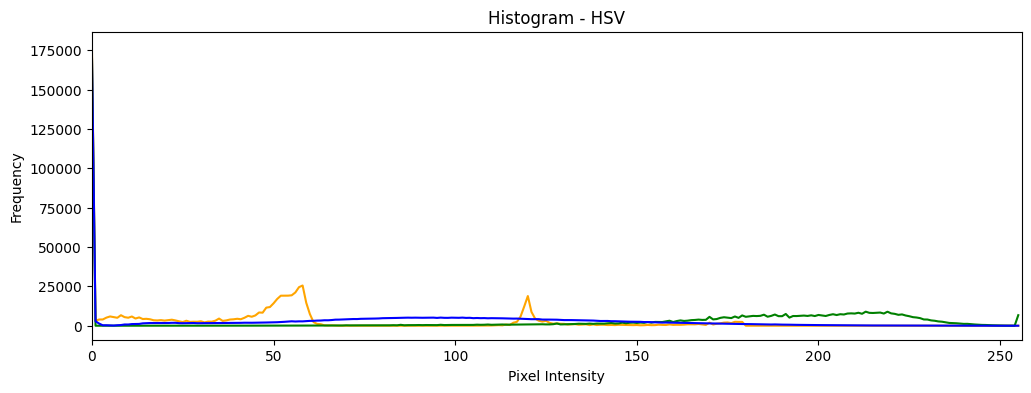

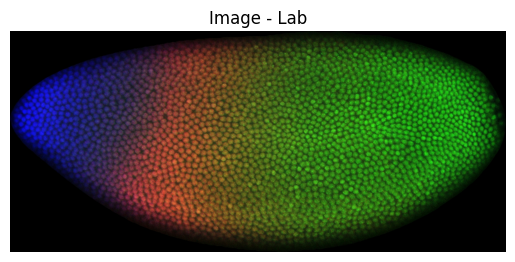

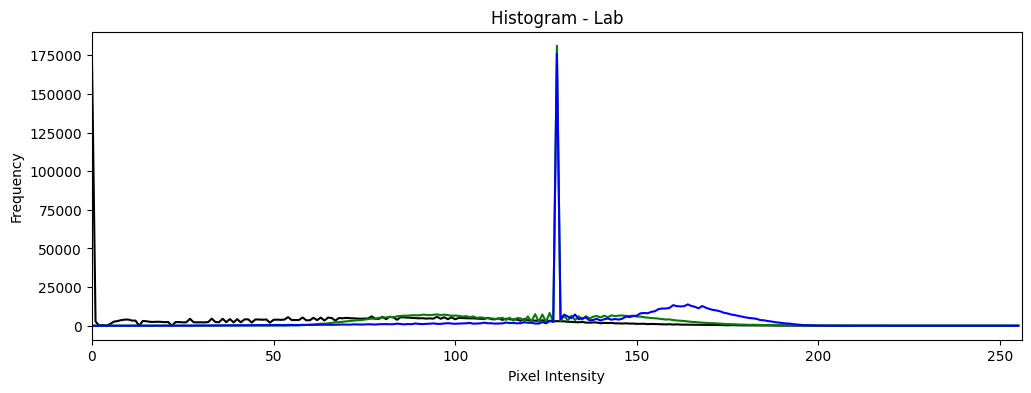

In [10]:
# Carregar imagem colorida
image_path = 'image.jpg'  
plot_image_channels(image_path)

    

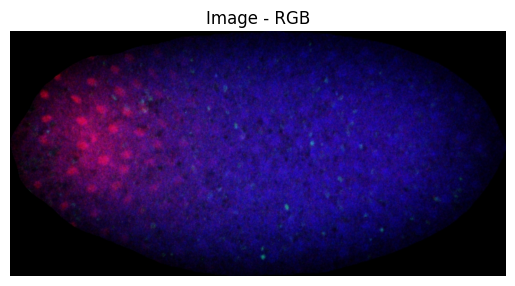

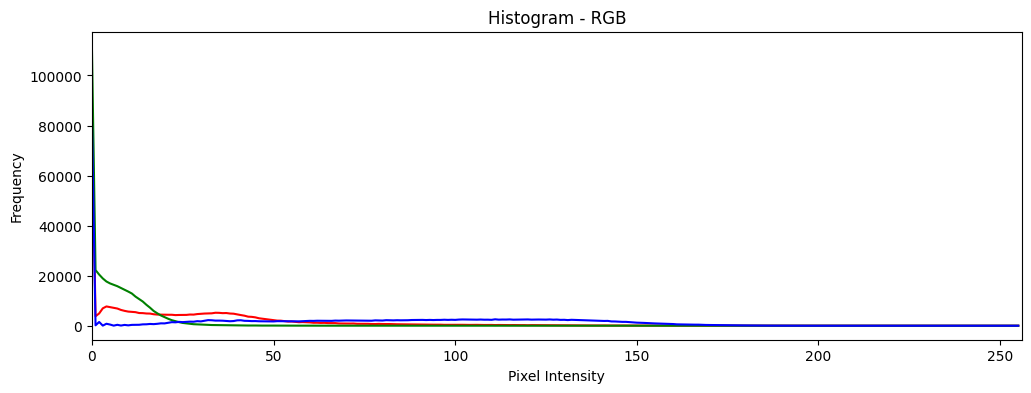

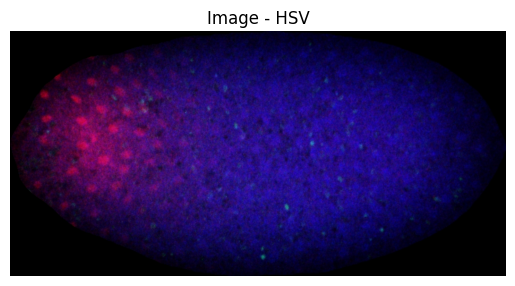

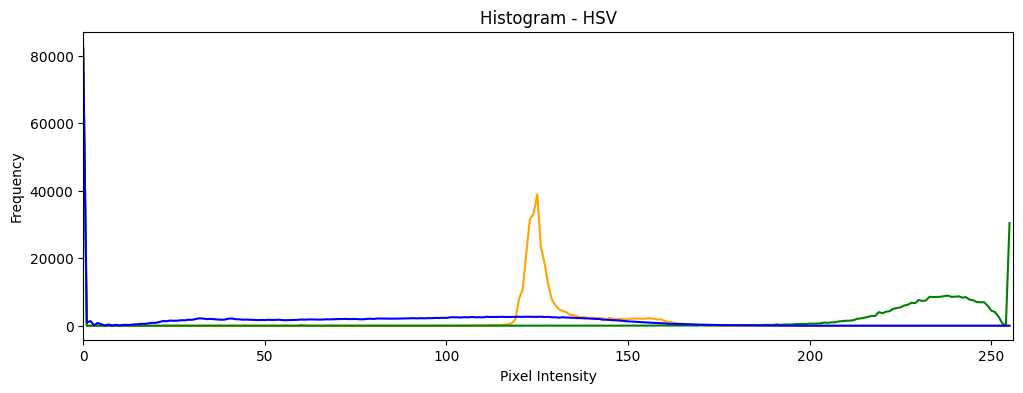

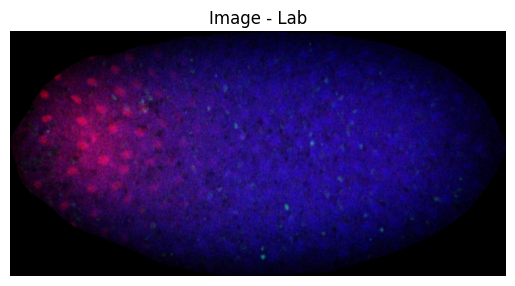

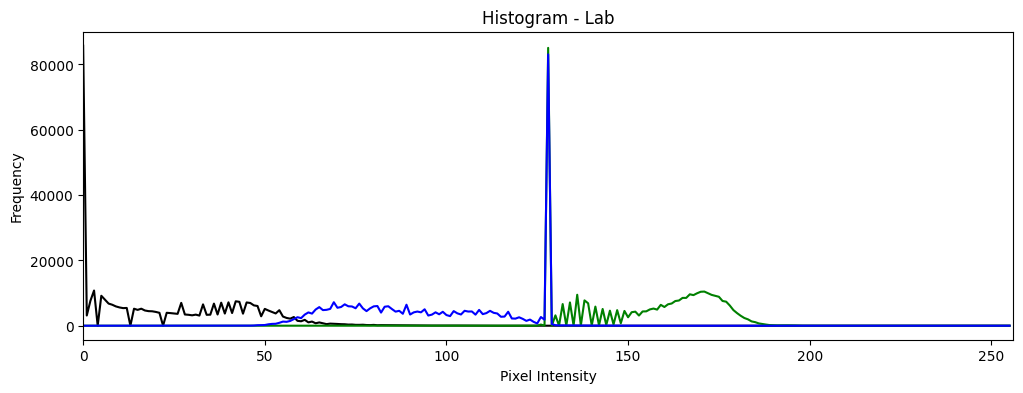

In [11]:
# Carregar imagem colorida
image_path = 'image2.jpg'  
plot_image_channels(image_path)

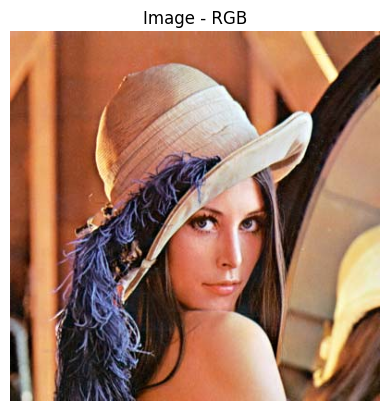

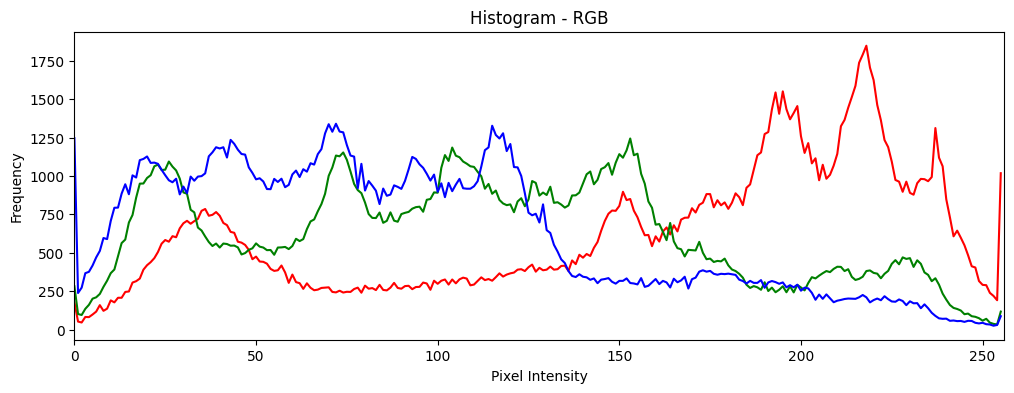

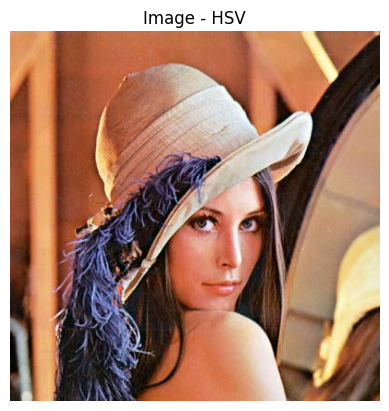

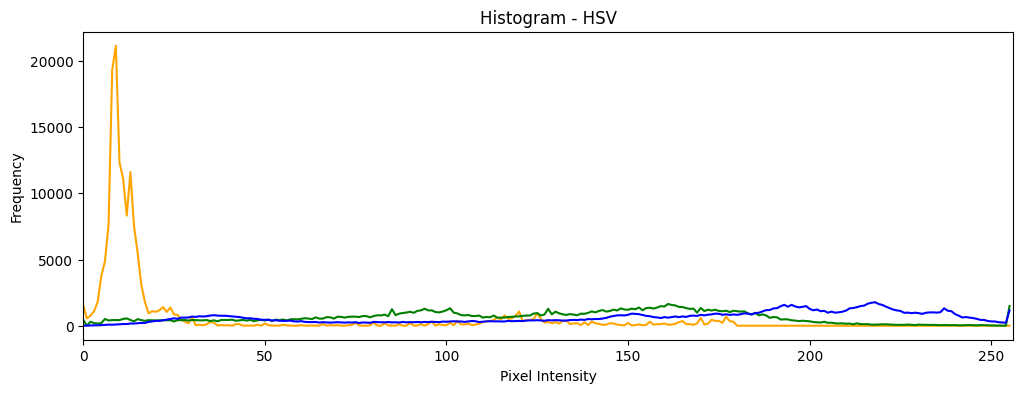

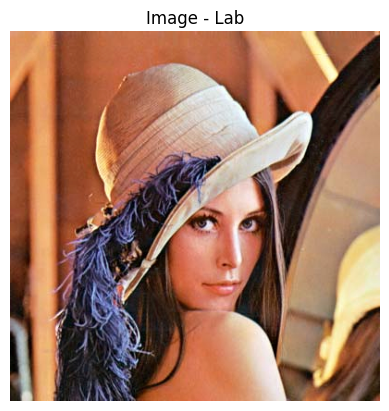

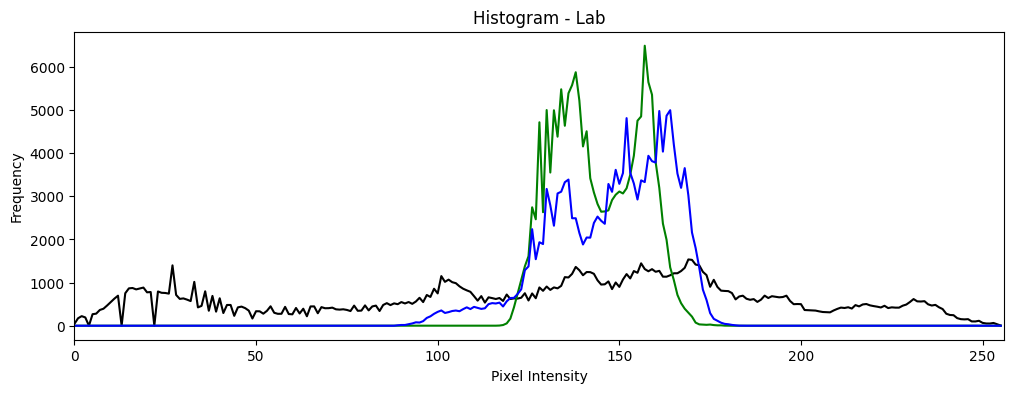

In [12]:
# Carregar imagem colorida
image_path = 'Lenna.jpg'  
plot_image_channels(image_path)

2)	Utilizando a imagem do mandrill, faça rotinas para detecção do focinho (região vermelha e azul). Utilize algum algoritmo de limiarização.

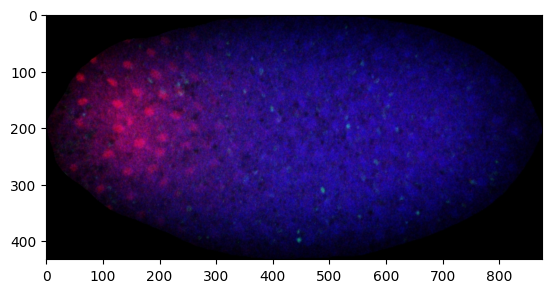

In [13]:
img_mand = cv2.imread("mandrill.tiff", cv2.IMREAD_COLOR)
img_mand_RGB = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img_mand_RGB)


In [14]:
# filtro gaussiano

# Função para adicionar padding
def adicionar_padding(imagem, altura_mascara, largura_mascara):
    margem_altura = altura_mascara // 2
    margem_largura = largura_mascara // 2
    imagem_padded = np.pad(imagem, ((margem_altura, margem_altura), (margem_largura, margem_largura)), mode='constant')
    return imagem_padded

# Função para aplicar a convolução com uma máscara
def aplicar_convolucao(img, mascara):
    altura_mascara, largura_mascara = mascara.shape
    imagem_padded = adicionar_padding(img, altura_mascara, largura_mascara)
    resultado = np.zeros_like(img)

    # Aplicar a convolução manualmente
    for i in range(altura_mascara // 2, imagem_padded.shape[0] - altura_mascara // 2):
        for j in range(largura_mascara // 2, imagem_padded.shape[1] - largura_mascara // 2):
            janela = imagem_padded[i - altura_mascara // 2:i + altura_mascara // 2 + 1,
                                   j - largura_mascara // 2:j + largura_mascara // 2 + 1]
            resultado[i - altura_mascara // 2, j - largura_mascara // 2] = np.sum(janela * mascara)
    
    return np.clip(resultado, 0, 255).astype(np.uint8)

img2 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)

# plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

def g(x,y,sigma):
    fator = (1/ (2*np.pi*(sigma**2)))
    result = fator * np.exp( -(x**2 + y**2) / (2*(sigma**2)))
    
    return result

def criar_mascara(tamanho,sigma):
    result = np.zeros((tamanho,tamanho))
    a = tamanho//2
    b = tamanho//2
    
    for x in range(-a, a):
        for y in range(-b, b):
            result[x+a+1, y+b+1] = g(x,y,sigma)
    result = result/np.sum(result[:])
    
    return result

[]

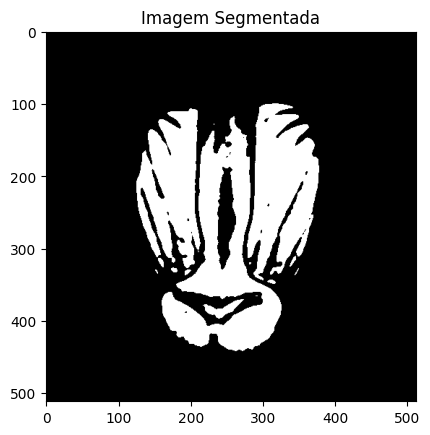

In [15]:
img_mand = cv2.imread("mandrill.tiff", cv2.IMREAD_COLOR)
img_mand_RGB = cv2.cvtColor(img_mand, cv2.COLOR_BGR2RGB)
img_mand_azul = img_mand_RGB[:, :, 0]  # Canal azul
img_mand_vermelho = img_mand_RGB[:, :, 2]  # Canal vermelho

# Definindo a máscara para aplicar o filtro gaussiano
sigma_9x9 = 2
tamanho_9x9 = 9
mascara_9x9 = criar_mascara(tamanho_9x9, sigma_9x9)


# Segmentação com suavização
blur_azul = aplicar_convolucao(img_mand_azul, mascara_9x9)
_, segmented_image_blue = cv2.threshold(blur_azul, 230, 1, cv2.THRESH_BINARY)

blur_vermelho = aplicar_convolucao(img_mand_vermelho, mascara_9x9)
_, segmented_image_vermelho = cv2.threshold(blur_vermelho, 210, 1, cv2.THRESH_BINARY)

combined_segmentation = segmented_image_blue + segmented_image_vermelho

# Exibe as imagens segmentadas
plt.imshow(combined_segmentation, cmap="gray")
plt.title(f'Imagem Segmentada')
plt.plot()

3)	Utilizando a imagem HE.jpg, tente detectar e contar a quantidade de núcleos celulares (em azul). Aplicar o Ostu para os 9 canais de cores e avaliar qual foi melhor (R,G,B,H,S,V,L,a,b)

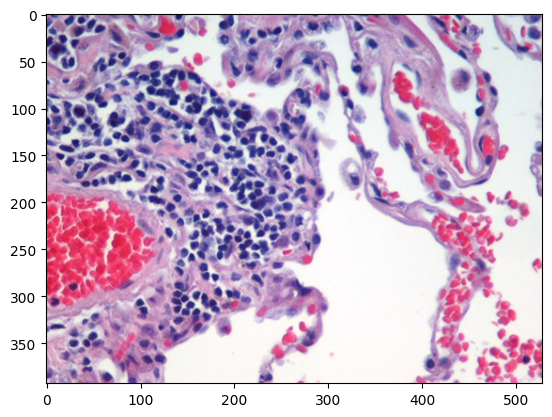

In [16]:
img_he = cv2.imread("HE.jpg", cv2.IMREAD_COLOR)
img_he_RGB = cv2.cvtColor(img_he, cv2.COLOR_BGR2RGB)
plt.imshow(img_he_RGB)

In [17]:
# Função para calcular o threshold de Otsu manualmente
def otsu_threshold(image):
    # Calcula o histograma da imagem
    hist, _ = np.histogram(image.ravel(), bins=256, range=(0, 256))
    total_pixels = image.size
    
    # Variáveis para calcular a probabilidade acumulada e média
    sumB = 0
    wB = 0
    sum1 = np.dot(np.arange(256), hist)
    var_max = 0.0
    threshold = 0
    
    # Loop para calcular a variância entre classes para cada threshold
    for i in range(256):
        wB += hist[i]  # Peso da classe background
        if wB == 0:
            continue
        wF = total_pixels - wB  # Peso da classe foreground
        if wF == 0:
            break
        sumB += i * hist[i]
        mB = sumB / wB  # Média da classe background
        mF = (sum1 - sumB) / wF  # Média da classe foreground
        var_between = wB * wF * (mB - mF) ** 2  # Variância entre classes
        
        # Maximiza a variância entre classes
        if var_between > var_max:
            var_max = var_between
            threshold = i

    return threshold

# Função para aplicar o threshold manual de Otsu
def apply_otsu_manual(image):
    threshold = otsu_threshold(image)
    # Aplica o threshold para segmentar a imagem
    _, imagem_binaria = cv2.threshold(image, threshold, 1, cv2.THRESH_BINARY)
    return imagem_binaria, threshold

In [31]:
def plotar_componentes_conexos(num_labels, labels, img_rgb):
    labels_colored = np.zeros((*labels.shape, 3), dtype=np.uint8)
    for i in range(1, num_labels):
        color = np.random.randint(0, 255, size=3)
        labels_colored[labels == i] = color

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)

    plt.subplot(1, 2, 2)
    plt.imshow(labels_colored)
    plt.title(f'Componentes Conexos: {num_labels - 1}')
    plt.show()

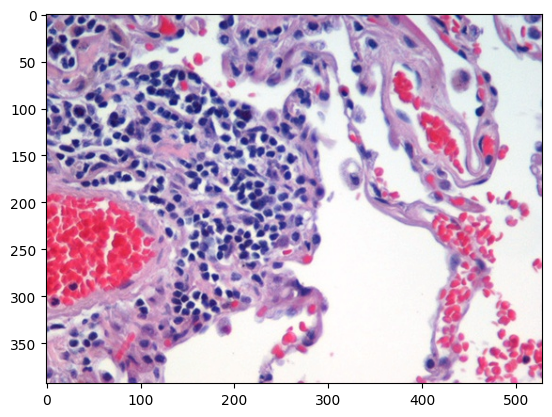

In [19]:
img_he = cv2.imread("HE.jpg", cv2.IMREAD_COLOR)

img_he_RGB = cv2.cvtColor(img_he, cv2.COLOR_BGR2RGB)
image_he_hsv = cv2.cvtColor(img_he, cv2.COLOR_BGR2HSV)
image_he_lab = cv2.cvtColor(img_he, cv2.COLOR_BGR2Lab)

plt.imshow(img_he_RGB)
plt.imshow(cv2.cvtColor(image_he_hsv, cv2.COLOR_HSV2RGB))
plt.imshow(cv2.cvtColor(image_he_lab, cv2.COLOR_Lab2RGB))

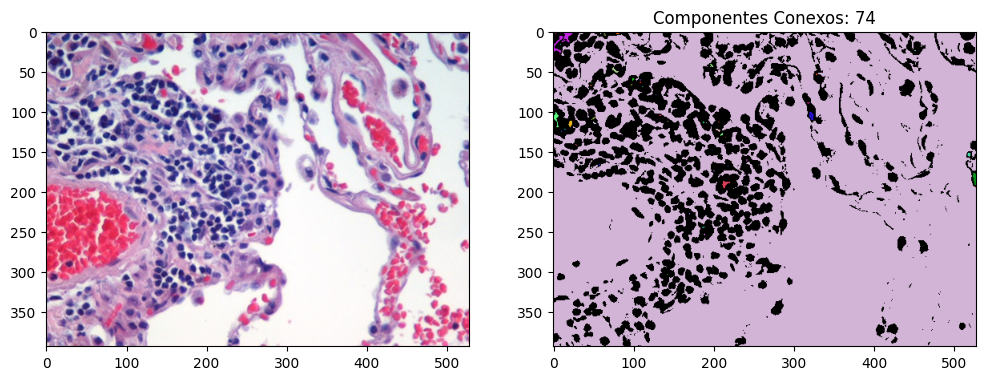

In [32]:
canal_azul_rgb = img_he_RGB[:,:,0]

segmented_image, threshold = apply_otsu_manual(canal_azul_rgb)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(segmented_image, connectivity=8)

plotar_componentes_conexos(num_labels, labels, img_rgb)

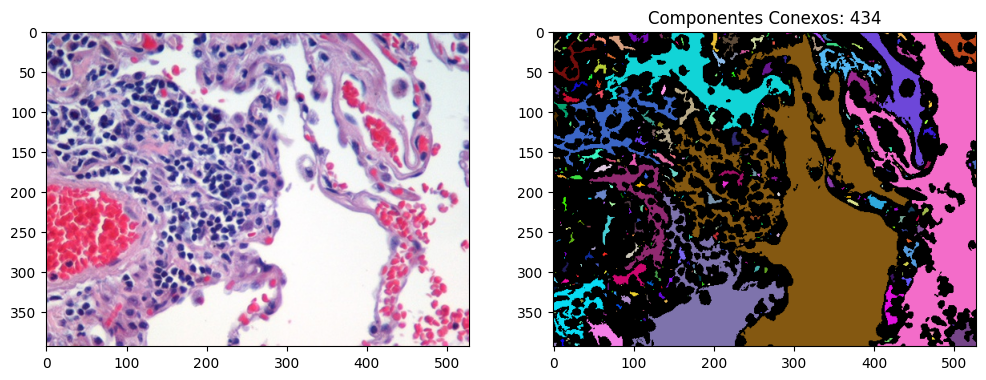

In [34]:
canal_verde_rgb = img_he_RGB[:,:,1]

segmented_image, threshold = apply_otsu_manual(canal_verde_rgb)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(segmented_image, connectivity=8)

plotar_componentes_conexos(num_labels, labels, img_rgb)

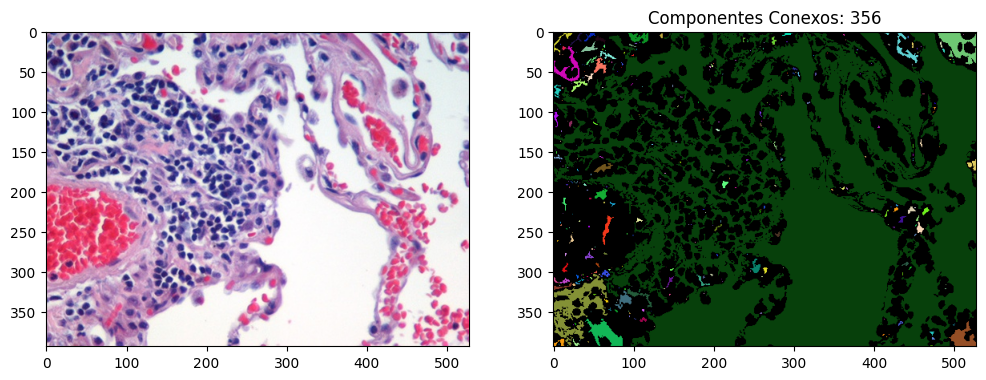

In [35]:
canal_vermelho_rgb = img_he_RGB[:,:,2]

segmented_image, threshold = apply_otsu_manual(canal_vermelho_rgb)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(segmented_image, connectivity=8)

plotar_componentes_conexos(num_labels, labels, img_rgb)

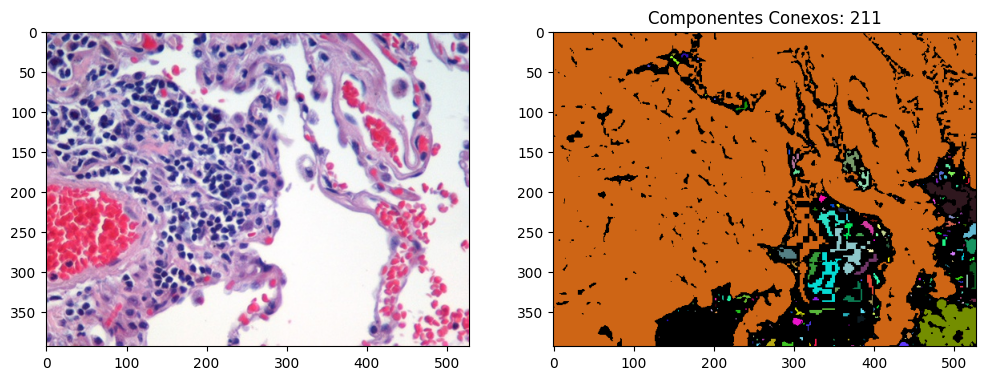

In [36]:
canal_matiz_hsv = image_he_hsv[:,:,0] # Canal H (Matiz)

segmented_image, threshold = apply_otsu_manual(canal_matiz_hsv)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(segmented_image, connectivity=8)

plotar_componentes_conexos(num_labels, labels, img_rgb)

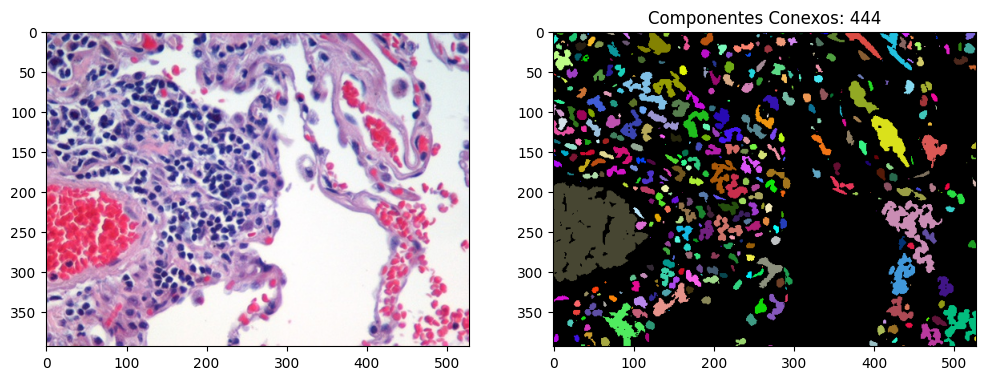

In [37]:
canal_saturacao_hsv = image_he_hsv[:,:,1] # Canal S (Saturação)

segmented_image, threshold = apply_otsu_manual(canal_saturacao_hsv)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(segmented_image, connectivity=8)

plotar_componentes_conexos(num_labels, labels, img_rgb)

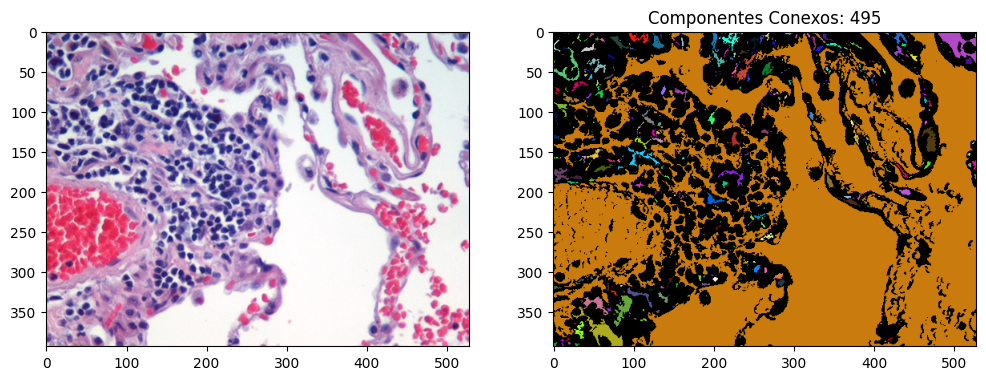

In [39]:
canal_valor_hsv = image_he_hsv[:,:,2] # Canal V (Valor)

segmented_image, threshold = apply_otsu_manual(canal_valor_hsv)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(segmented_image, connectivity=8)

plotar_componentes_conexos(num_labels, labels, img_rgb)

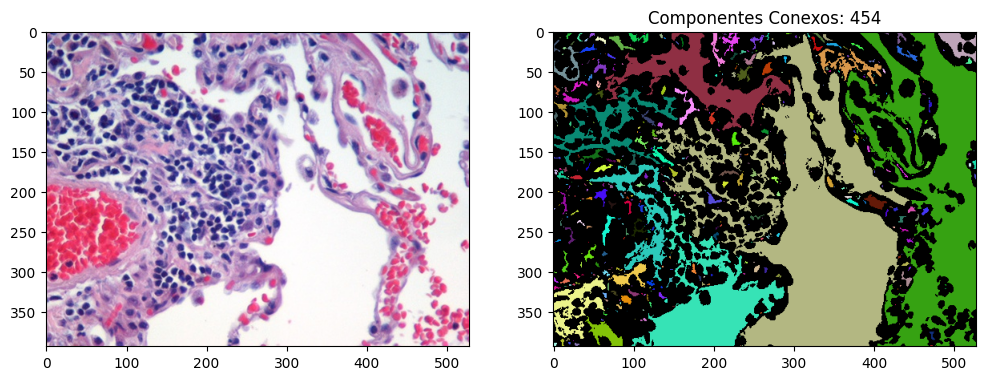

In [40]:
canal_luminosidade_lab = image_he_lab[:, :, 0]  # Canal L (Luminosidade)

segmented_image, threshold = apply_otsu_manual(canal_luminosidade_lab)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(segmented_image, connectivity=8)

plotar_componentes_conexos(num_labels, labels, img_rgb)

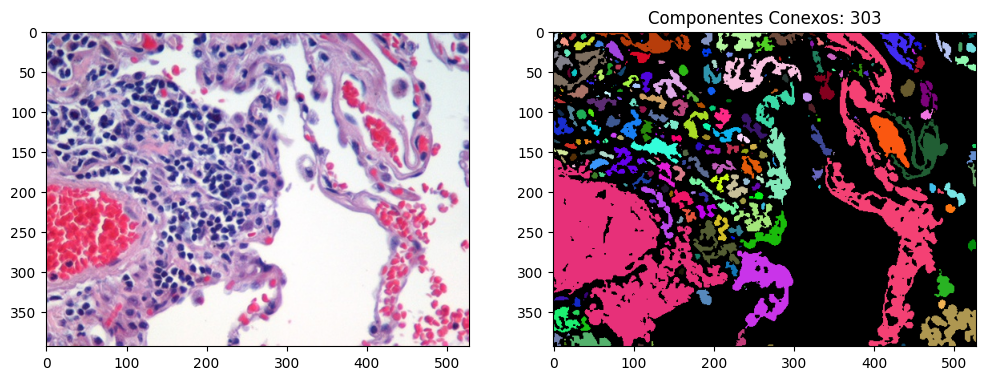

In [42]:
canal_verde_vermelho_lab = image_he_lab[:, :, 1]  # Canal A (verde-vermelho)

segmented_image, threshold = apply_otsu_manual(canal_verde_vermelho_lab)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(segmented_image, connectivity=8)

plotar_componentes_conexos(num_labels, labels, img_rgb)

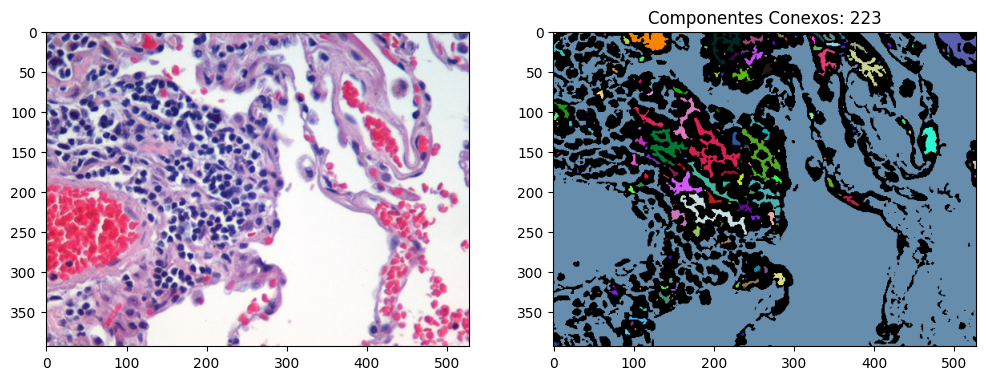

In [43]:
canal_azul_amarelo_lab = image_he_lab[:, :, 2]  # Canal B (azul-amarelo)

segmented_image, threshold = apply_otsu_manual(canal_azul_amarelo_lab)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(segmented_image, connectivity=8)

plotar_componentes_conexos(num_labels, labels, img_rgb)